### LOADING THE DATA

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
df = pd.read_csv('Global-Superstore - Global-Superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,02-05-2013,02-07-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11-05-2013,11-06-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
#Checking the shape of the dataset
df.shape

(51290, 24)

# DATA VISUALISATION

C:\Users\ramya\AppData\Local\Temp\ipykernel_560\3096189954.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_trend = df.groupby(df['Order Date'].dt.to_period('M')).sum()['Sales']


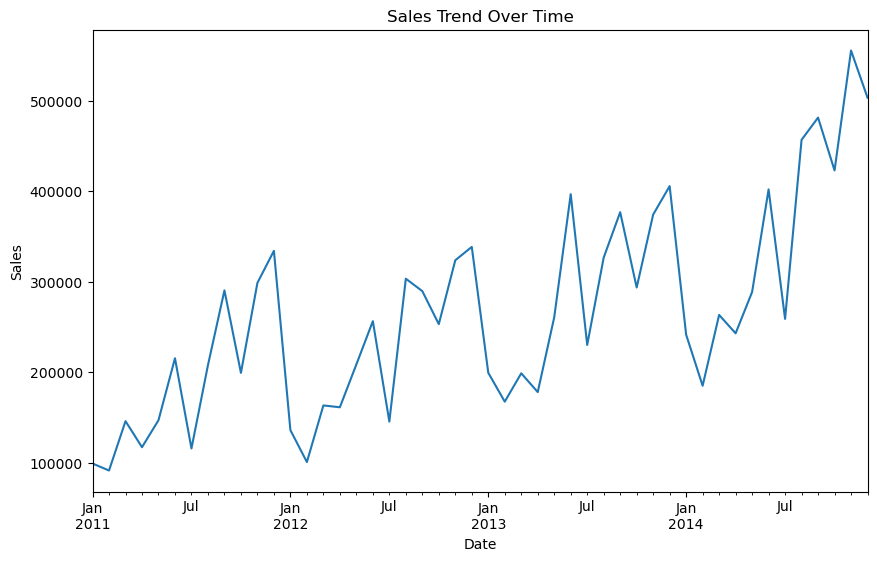

In [4]:
# 1. Sales Trend Over Time
plt.figure(figsize=(10, 6))
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_trend = df.groupby(df['Order Date'].dt.to_period('M')).sum()['Sales']
sales_trend.plot(kind='line')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

C:\Users\ramya\AppData\Local\Temp\ipykernel_560\403532061.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sales = df.groupby('Category').sum()['Sales']


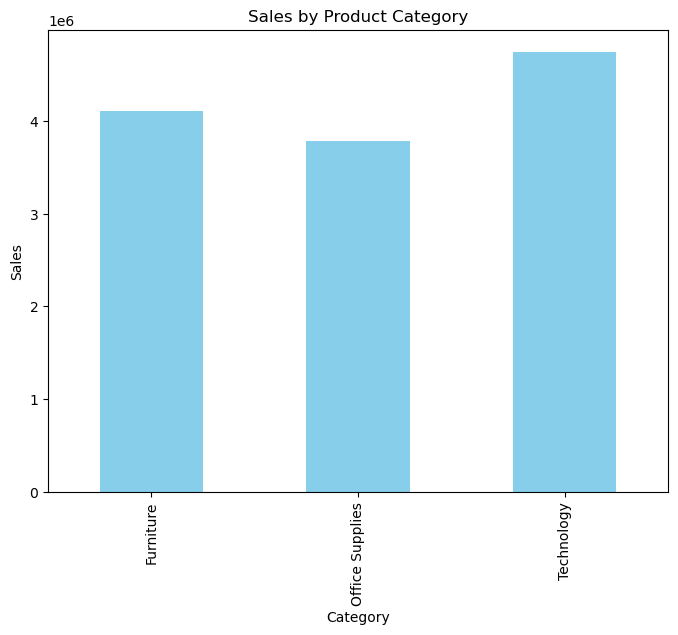

In [5]:
# 2. Sales by Product Category
plt.figure(figsize=(8, 6))
category_sales = df.groupby('Category').sum()['Sales']
category_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

C:\Users\ramya\AppData\Local\Temp\ipykernel_560\4053753914.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_products = df.groupby('Product Name').sum().sort_values(by='Sales', ascending=False).head(10)


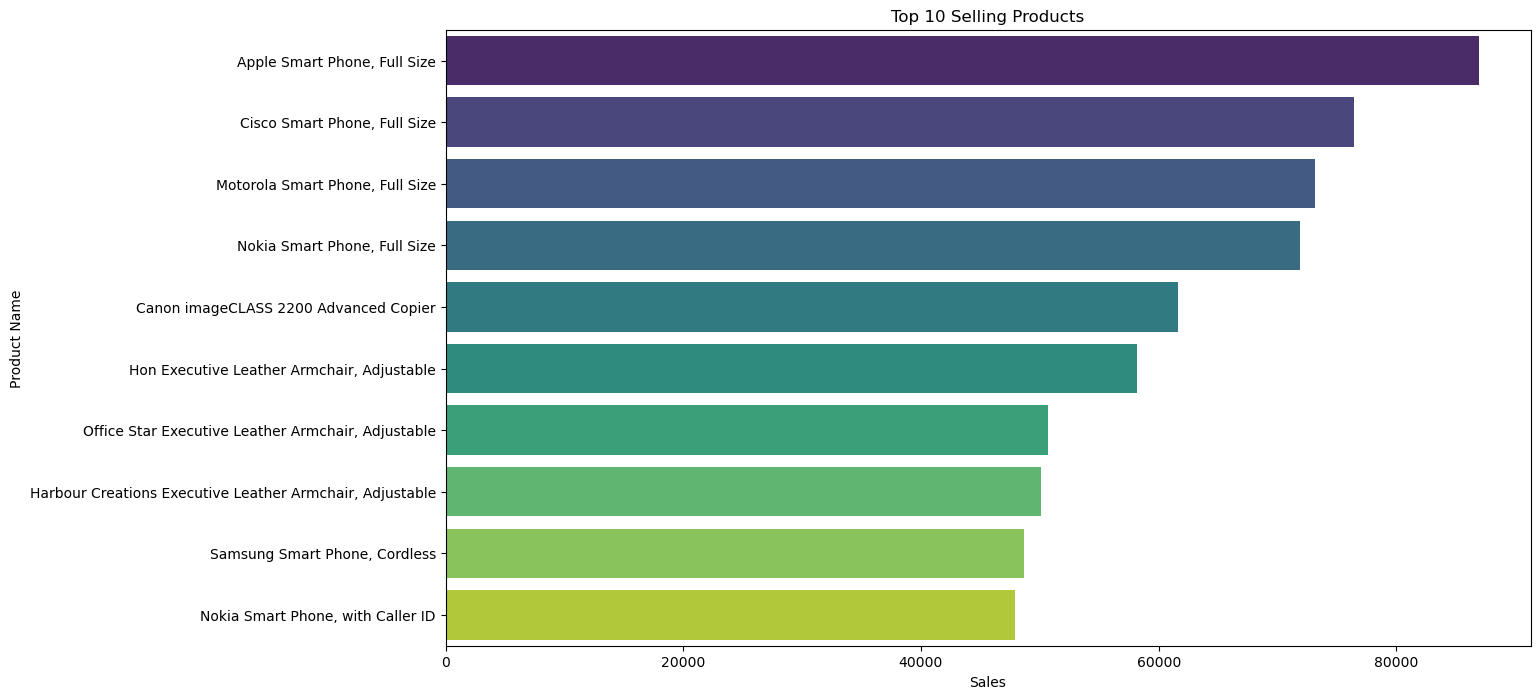

In [6]:

# 3. Top Selling Products
top_products = df.groupby('Product Name').sum().sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_products['Sales'], y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

C:\Users\ramya\AppData\Local\Temp\ipykernel_560\89757115.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df.groupby('Month-Year').sum()['Sales']


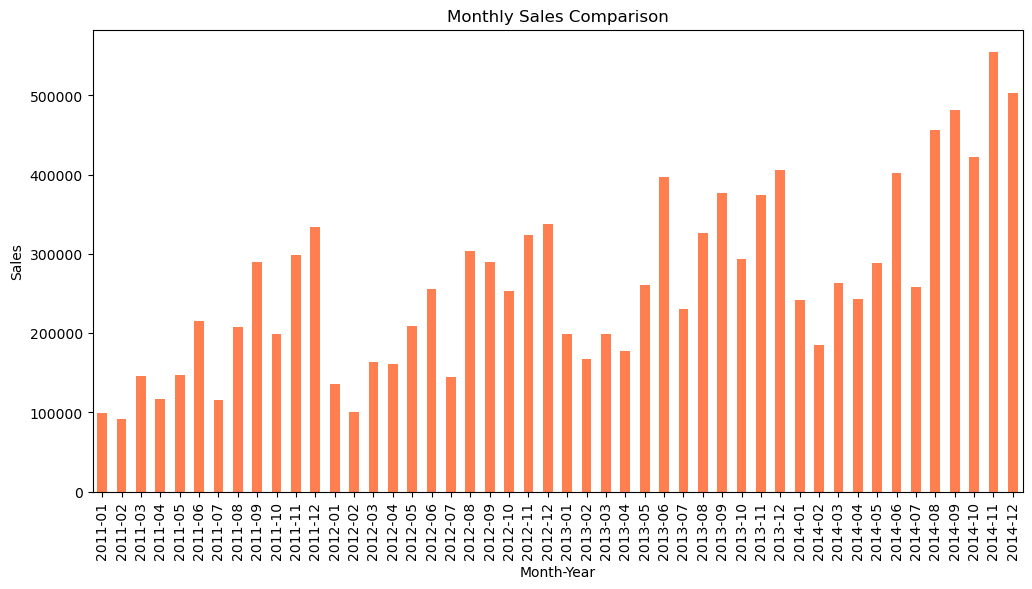

In [7]:
# 4. Monthly Sales Comparison
plt.figure(figsize=(12, 6))
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year').sum()['Sales']
monthly_sales.plot(kind='bar', color='coral')
plt.title('Monthly Sales Comparison')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.show()

C:\Users\ramya\AppData\Local\Temp\ipykernel_560\2216427400.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_profit = df.groupby('State').sum().sort_values(by='Profit', ascending=False).head(10)


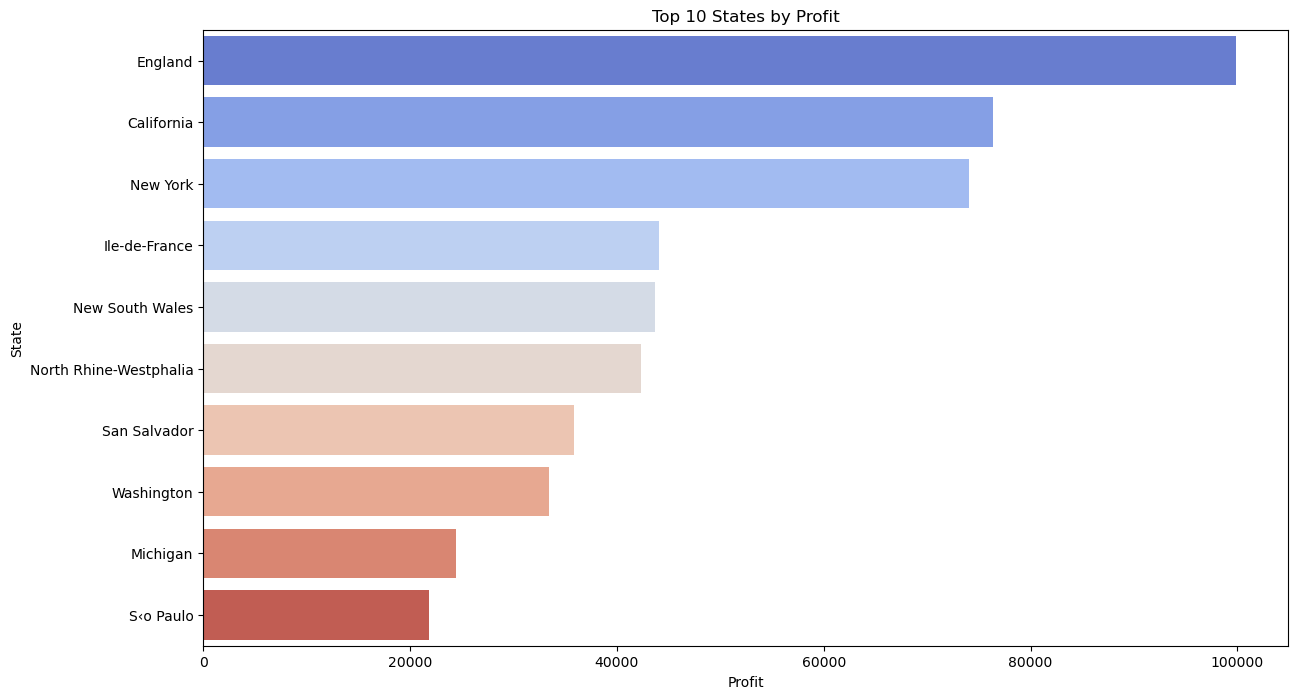

In [8]:
# 5. Profit by State
plt.figure(figsize=(14, 8))
state_profit = df.groupby('State').sum().sort_values(by='Profit', ascending=False).head(10)
sns.barplot(x=state_profit['Profit'], y=state_profit.index, palette='coolwarm')
plt.title('Top 10 States by Profit')
plt.xlabel('Profit')
plt.ylabel('State')
plt.show()

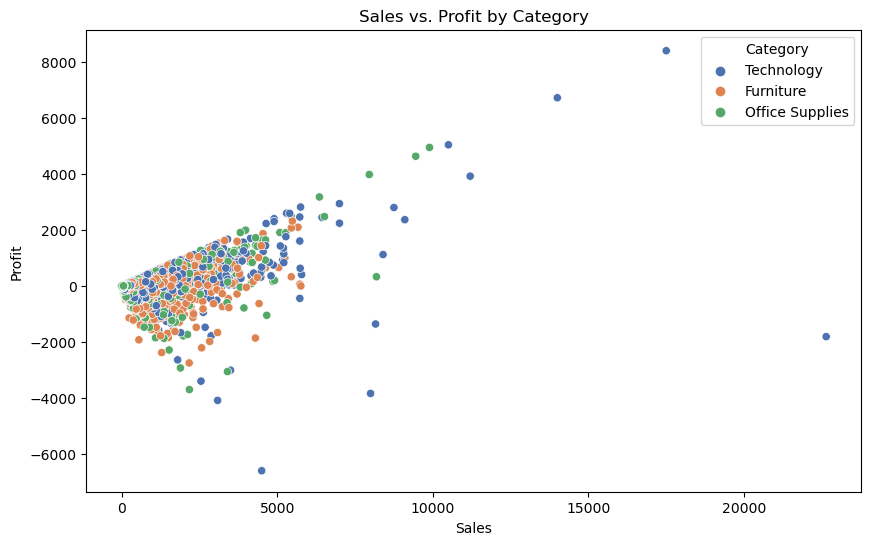

In [9]:
#Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', palette='deep')
plt.title('Sales vs. Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


C:\Users\ramya\AppData\Local\Temp\ipykernel_560\2347368007.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  segment_sales = df.groupby('Segment').sum()['Sales']


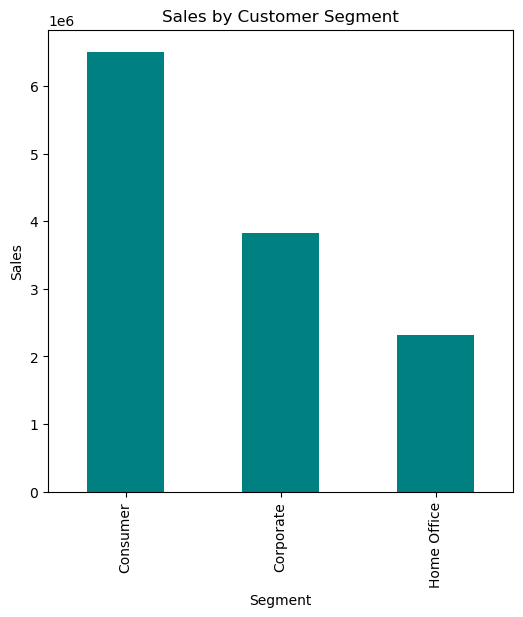

In [10]:
plt.figure(figsize=(6, 6))
segment_sales = df.groupby('Segment').sum()['Sales']
segment_sales.plot(kind='bar', color='teal')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()


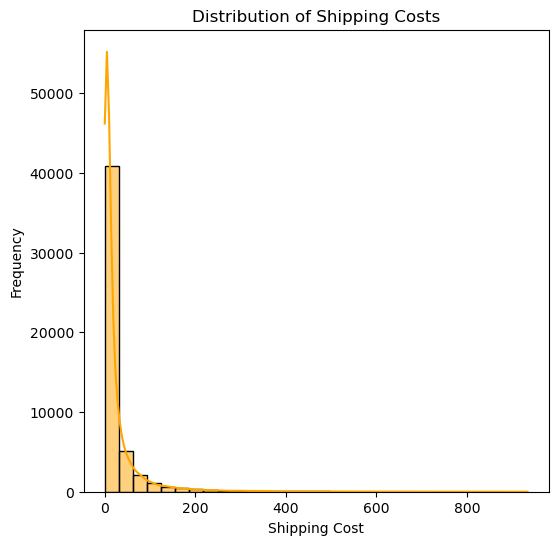

In [11]:
#Distribution of shipping costs
plt.figure(figsize=(6, 6))
sns.histplot(df['Shipping Cost'], bins=30, kde=True, color='orange')
plt.title('Distribution of Shipping Costs')
plt.xlabel('Shipping Cost')
plt.ylabel('Frequency')
plt.show()


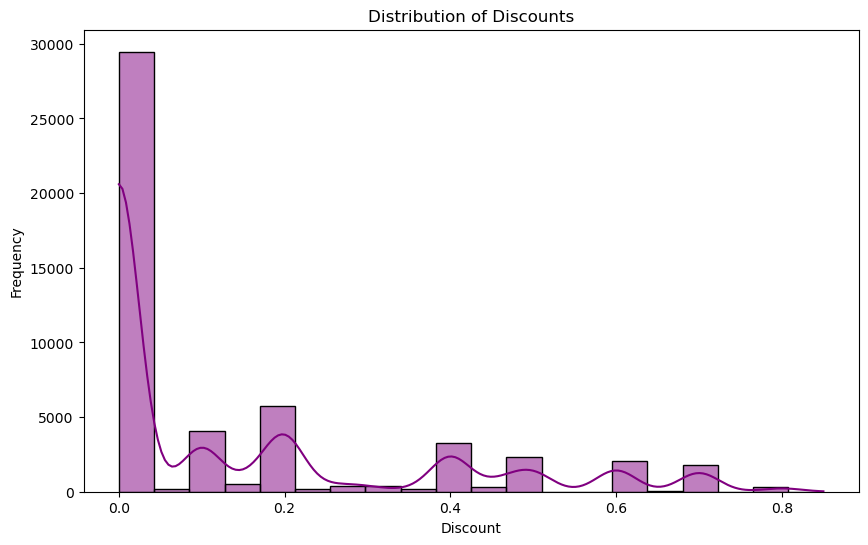

In [12]:
#Discounts given
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], bins=20, kde=True, color='purple')
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()



C:\Users\ramya\AppData\Local\Temp\ipykernel_560\408182514.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


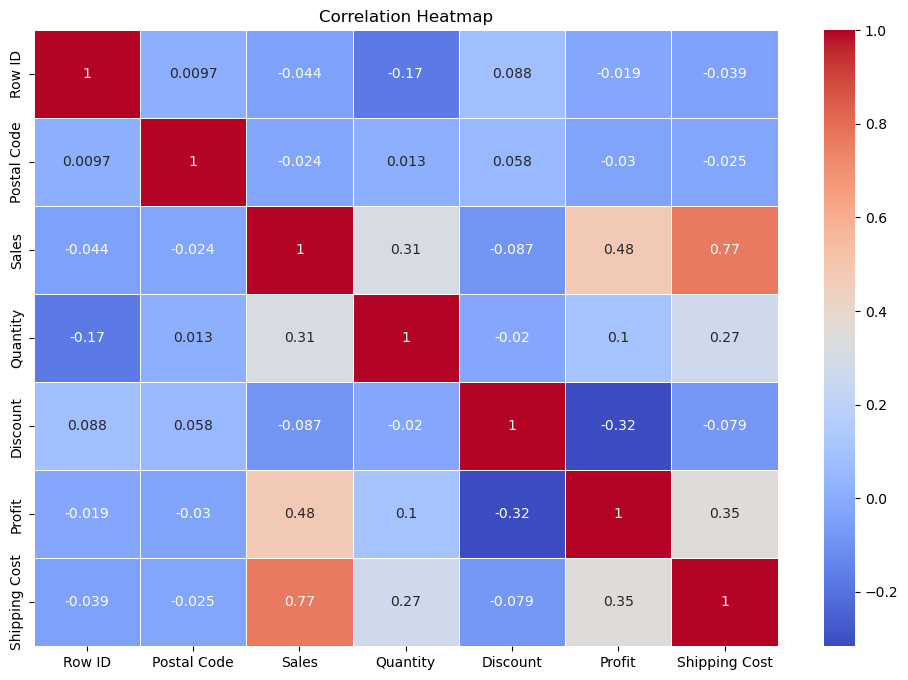

In [13]:
#correlation heat map
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


C:\Users\ramya\AppData\Local\Temp\ipykernel_560\102497122.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_city_sales = df[df['City'].isin(top_cities)].groupby('City').sum()['Sales']


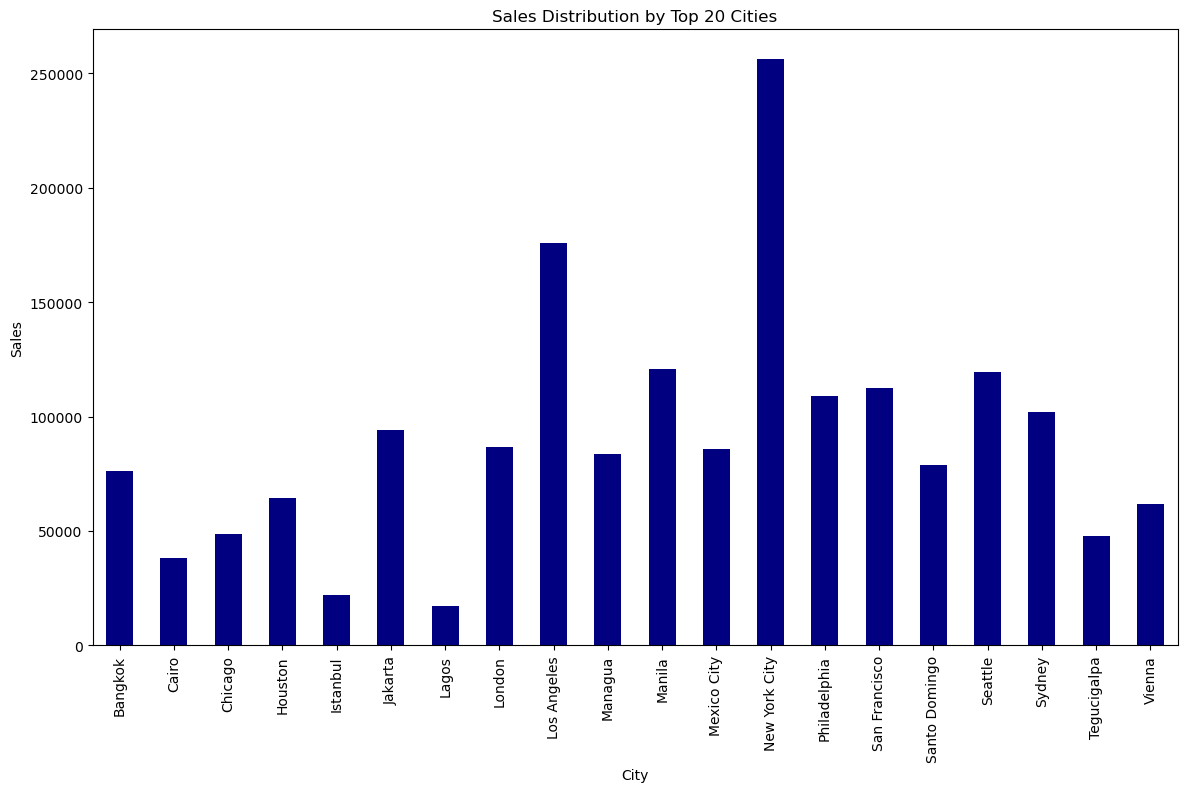

In [14]:
#Sales Distribution by City
top_cities = df['City'].value_counts().head(20).index
top_city_sales = df[df['City'].isin(top_cities)].groupby('City').sum()['Sales']
plt.figure(figsize=(14, 8))
top_city_sales.plot(kind='bar', color='navy')
plt.title('Sales Distribution by Top 20 Cities')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()


C:\Users\ramya\AppData\Local\Temp\ipykernel_560\201646630.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_products_sales_quantity = df.groupby('Product Name').sum()[['Sales', 'Quantity']].sort_values(by='Sales', ascending=False).head(10)


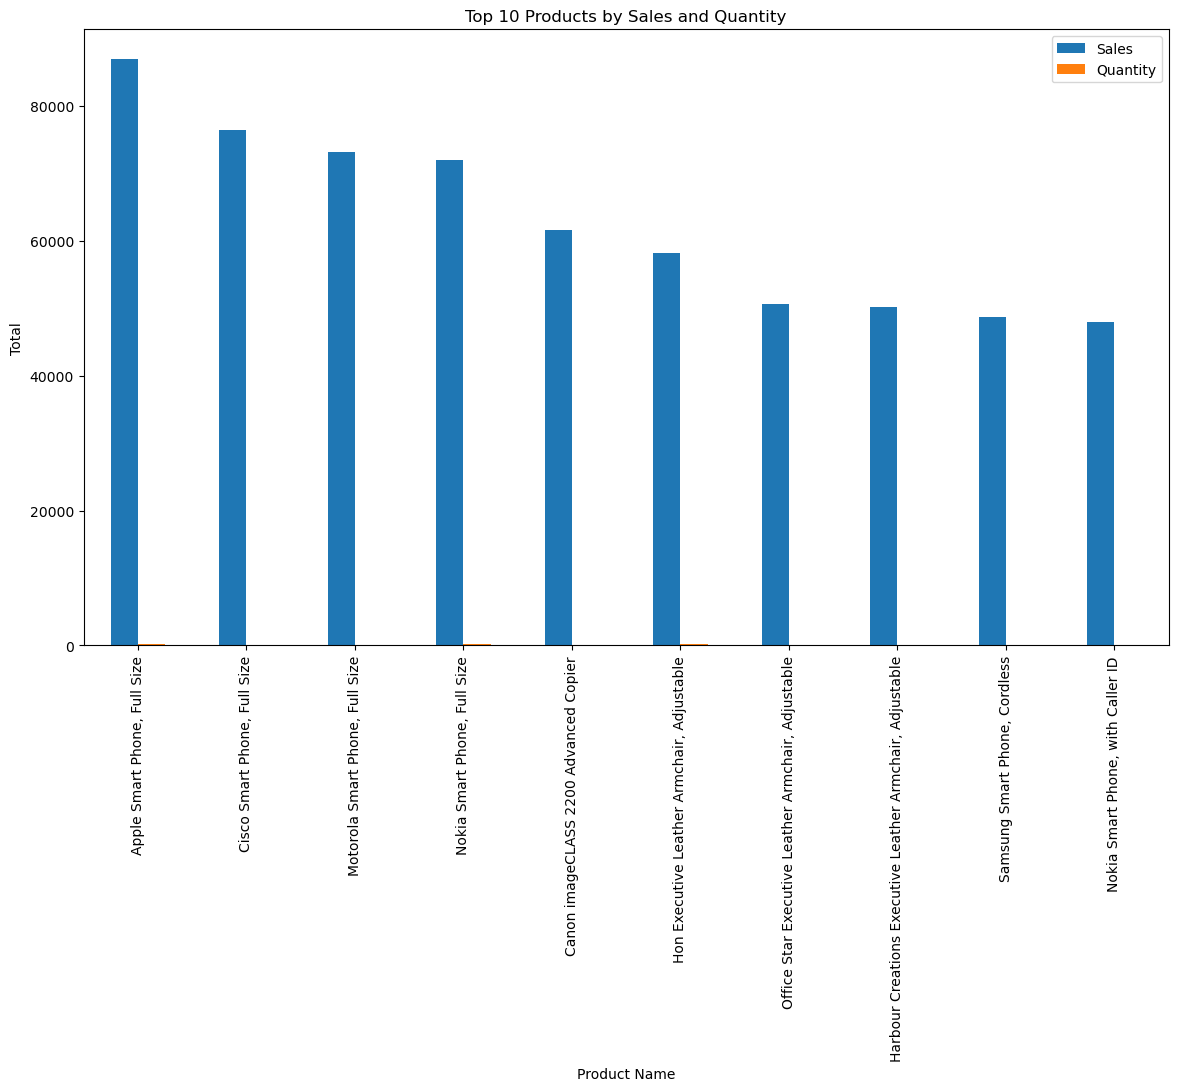

In [15]:
#sales and quantity by product
top_products_sales_quantity = df.groupby('Product Name').sum()[['Sales', 'Quantity']].sort_values(by='Sales', ascending=False).head(10)
top_products_sales_quantity.plot(kind='bar', figsize=(14, 8))
plt.title('Top 10 Products by Sales and Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total')
plt.show()


C:\Users\ramya\AppData\Local\Temp\ipykernel_560\576585600.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_category_profit_margin = df.groupby('Sub-Category').mean()['Profit Margin']


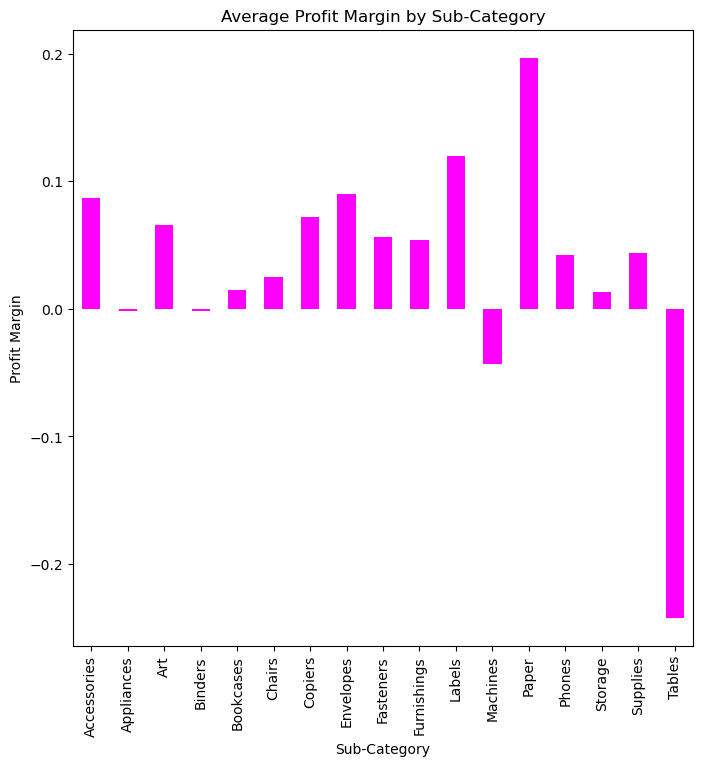

In [16]:
#profit margin by subcategory
df['Profit Margin'] = df['Profit'] / df['Sales']
sub_category_profit_margin = df.groupby('Sub-Category').mean()['Profit Margin']
plt.figure(figsize=(8, 8))
sub_category_profit_margin.plot(kind='bar', color='magenta')
plt.title('Average Profit Margin by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit Margin')
plt.show()
